# IMDB Sentiment Analysis using LSTM

## Importing libraries

In [12]:
import re
import pandas as pd
from sklearn.model_selection import train_test_split as tts
from keras.layers import Dense, LSTM,Embedding, SpatialDropout1D
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import pickle
import matplotlib.pyplot as plt




In [13]:
data=pd.read_csv('IMDB-Dataset.csv')

In [14]:
# columns of the dataset
data.columns

Index(['review', 'sentiment'], dtype='object')

In [15]:
# shape of the data
data.shape

(50000, 2)

In [16]:
# 5 elements from the top
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


## Text Preprocessing

In [17]:
import string
def clean_html(text):
    clean=re.compile('<.*?>')
    cleantext=re.sub(clean,'',text)
    return cleantext
    
def clean_text1(text):
    text=text.lower()
    text=re.sub('\[.*?\]','',text)
    text=re.sub('[%s]'%re.escape(string.punctuation),'',text)
    text=re.sub('\w*\d\w*','',text)
    return text

def clean_text2(text):
    text=re.sub('[''"",,,]','',text)
    text=re.sub('\n','',text)
    return text
    
cleaned_html=lambda x:clean_html(x)
cleaned1=lambda x:clean_text1(x)
cleaned2=lambda x:clean_text2(x)

data['review']=pd.DataFrame(data.review.apply(cleaned_html))
data['review']=pd.DataFrame(data.review.apply(cleaned1))
data['review']=pd.DataFrame(data.review.apply(cleaned2))

## Defining the model

In [18]:
max_features=5000
tokenizer = Tokenizer(num_words=max_features, split=' ')
tokenizer.fit_on_texts(data['review'].values)
X = tokenizer.texts_to_sequences(data['review'].values)
X = pad_sequences(X,maxlen=600)


In [19]:
print(X)

[[   0    0    0 ...  121 3931  498]
 [   0    0    0 ... 1869   72  222]
 [   0    0    0 ...   63   14  328]
 ...
 [   0    0    0 ... 1626    2    2]
 [   0    0    0 ...   67  702   41]
 [   0    0    0 ...  832   10   16]]


In [20]:
embed_dim = 64
lstm_out = 64

model = Sequential()
model.add(Embedding(max_features, embed_dim,input_length = X.shape[1]))
model.add(SpatialDropout1D(0.4))
model.add(LSTM(lstm_out, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(2,activation='softmax'))
model.compile(loss = 'binary_crossentropy', optimizer='adam',metrics = ['accuracy'])
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 600, 64)           320000    
_________________________________________________________________
spatial_dropout1d_1 (Spatial (None, 600, 64)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                33024     
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 130       
Total params: 353,154
Trainable params: 353,154
Non-trainable params: 0
_________________________________________________________________
None


## Split the dataset

In [21]:
Y=pd.get_dummies(data['sentiment']).values
X_train, X_test, Y_train, Y_test = tts(X,Y, test_size = 0.2, random_state = 42)


## Running the model

In [22]:
batch_size = 64
history = model.fit(X_train, Y_train, epochs = 15, batch_size=batch_size,validation_data=(X_test,Y_test),verbose = True)


Epoch 1/15
625/625 [==============================] - 886s 1s/step - loss: 0.4270 - accuracy: 0.8039 - val_loss: 0.2852 - val_accuracy: 0.8832
Epoch 2/15
625/625 [==============================] - 920s 1s/step - loss: 0.2937 - accuracy: 0.8832 - val_loss: 0.2851 - val_accuracy: 0.8844
Epoch 3/15
625/625 [==============================] - 908s 1s/step - loss: 0.2655 - accuracy: 0.8958 - val_loss: 0.3010 - val_accuracy: 0.8769
Epoch 4/15
625/625 [==============================] - 922s 1s/step - loss: 0.2569 - accuracy: 0.8968 - val_loss: 0.2829 - val_accuracy: 0.8832
Epoch 5/15
625/625 [==============================] - 885s 1s/step - loss: 0.2387 - accuracy: 0.9076 - val_loss: 0.2695 - val_accuracy: 0.8892
Epoch 6/15
625/625 [==============================] - 876s 1s/step - loss: 0.2074 - accuracy: 0.9206 - val_loss: 0.2758 - val_accuracy: 0.8928
Epoch 7/15
625/625 [==============================] - 878s 1s/step - loss: 0.2006 - accuracy: 0.9235 - val_loss: 0.3084 - val_accuracy: 0.8900

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


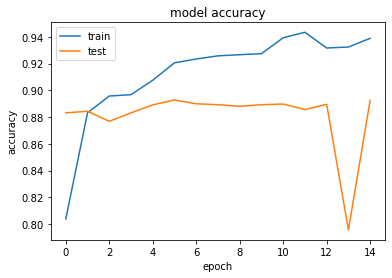

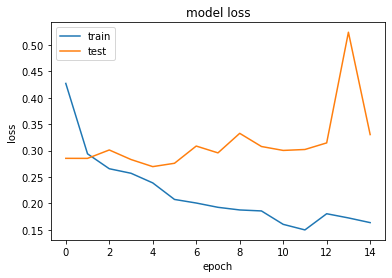

In [23]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()